# Machine Learning from the disaster

### Steps :
<ul>
    <li>Data_Cleanup : Removing Unecessary columns and filling nan values with mean</li>
    <li>Implement Decision Tree</li>
</ul>

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("./titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
columns_to_drop = ["PassengerId","Name","Ticket","Cabin","Embarked"]

In [4]:
data_cleaned = data.drop(columns_to_drop,axis=1)

In [5]:
data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()

In [8]:
data_cleaned['Sex'] = le.fit_transform(data_cleaned['Sex'])

In [9]:
data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [10]:
data_cleaned = data_cleaned.fillna(data_cleaned['Age'].mean())

In [11]:
Input = ["Pclass","Sex","Age","SibSp","Parch","Fare"]
Output = ["Survived"]

In [12]:
X = data_cleaned[Input]
Y = data_cleaned[Output]

In [13]:
print(X.shape,Y.shape)

(891, 6) (891, 1)


# Implementing Decision Trees 1).Entropy 2).Information Gain

In [14]:
def entropy(col):
    count = np.unique(col,return_counts=True)
    N = col.shape[0]
    ent = 0.0
    for ix in count[1]:
        p = ix/float(N)
        ent += -1.0*(p*np.log2(p))
    
    return ent

In [15]:
def divide_data(x,fkey,fval):
    x_right = pd.DataFrame([],columns=x.columns)
    x_left = pd.DataFrame([],columns=x.columns)
    for ix in range(x.shape[0]):
        val = x.loc[ix][fkey]
        if val > fval:
            x_right = x_right.append(x.loc[ix])
        else:
            x_left = x_left.append(x.loc[ix])
            
    return x_right,x_left
    

In [16]:
x_right,x_left = divide_data(X[:10],"Sex",0.5) #Testing the splitting
print(x_right)
print(x_left)

   Pclass  Sex        Age  SibSp  Parch     Fare
0     3.0  1.0  22.000000    1.0    0.0   7.2500
4     3.0  1.0  35.000000    0.0    0.0   8.0500
5     3.0  1.0  29.699118    0.0    0.0   8.4583
6     1.0  1.0  54.000000    0.0    0.0  51.8625
7     3.0  1.0   2.000000    3.0    1.0  21.0750
   Pclass  Sex   Age  SibSp  Parch     Fare
1     1.0  0.0  38.0    1.0    0.0  71.2833
2     3.0  0.0  26.0    0.0    0.0   7.9250
3     1.0  0.0  35.0    1.0    0.0  53.1000
8     3.0  0.0  27.0    0.0    2.0  11.1333
9     2.0  0.0  14.0    1.0    0.0  30.0708


In [17]:
def information_gain(x,fkey,fval):
    right,left = divide_data(x,fkey,fval)
    
    l = float(left.shape[0])/float(x.shape[0])
    r = float(right.shape[0])/float(x.shape[0])
    
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -100000
    
    i_gain = entropy(x.Survived) - (l*entropy(left.Survived)+r*entropy(right.Survived))
    return i_gain
    
    

In [18]:
for fx in data_cleaned.columns:
    print(fx)
    print(information_gain(data_cleaned,fx,data_cleaned[fx].mean()))

Survived
0.9607079018756469
Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.001158644038169343
SibSp
0.009584541813400071
Parch
0.015380754493137694
Fare
0.042140692838995464


In [19]:
data_cleaned.info() # All values are non-null 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


## Decision Tree

In [20]:
class DecisionTree :
    
    #Constructor
    def __init__(self,depth=0,max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.target = None
        self.depth = depth
        self.max_depth = max_depth
        
    def train(self,X_train):
        features = ["Pclass","Sex","Age","SibSp","Parch","Fare"]
        info_gain = []
        
        for ix in features:
            i_gain = information_gain(X_train,ix,X_train[ix].mean())
            info_gain.append(i_gain)
        
        self.fkey = features[np.argmax(info_gain)]
        self.fval = X_train[self.fkey].mean()
        print("Maing Tree Fetaures is : " + str(self.fkey))
        
        #Split Data
        data_right,data_left = divide_data(X_train,self.fkey,self.fval)
        data_right = data_right.reset_index(drop=True)
        data_left = data_left.reset_index(drop=True)
        
        #Check Survivors if truly a left node or tuly a right node
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:
            if X_train.Survived.mean() < 0.5:
                self.target = "Die"
            else:
                self.target = "Survive"
        
            return
        
        if self.depth >= self.max_depth:
            if X_train.Survived.mean() < 0.5:
                self.target = "Die"
            else:
                self.target = "Survive"
        
            return
        
        #Recursive call to left and right nodes
        self.left = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.right = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
        if X_train.Survived.mean() < 0.5:
            self.target = "Die"
        else:
            self.target = "Survive"
        
        return
    
    def predict(self,test):
        if test[self.fkey] >= self.fval:
            # Go to Right
            if self.right is None:
                return self.target
            else:
                return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            else:
                return self.left.predict(test)
                
        

In [21]:
d = DecisionTree()

## Splitting data in Train and Test

In [22]:
split = int(0.7*data_cleaned.shape[0])
train = data_cleaned[:split]
test  = data_cleaned[split:]
test = test.reset_index(drop=True)

In [23]:
print(test.shape,train.shape)

(268, 7) (623, 7)


In [24]:
d.train(train)

Maing Tree Fetaures is : Sex
Maing Tree Fetaures is : Pclass
Maing Tree Fetaures is : Age
Maing Tree Fetaures is : SibSp
Maing Tree Fetaures is : Pclass
Maing Tree Fetaures is : Age
Maing Tree Fetaures is : Age
Maing Tree Fetaures is : SibSp
Maing Tree Fetaures is : Parch
Maing Tree Fetaures is : Pclass
Maing Tree Fetaures is : SibSp
Maing Tree Fetaures is : Fare
Maing Tree Fetaures is : Parch
Maing Tree Fetaures is : Age
Maing Tree Fetaures is : Pclass
Maing Tree Fetaures is : Age
Maing Tree Fetaures is : Age
Maing Tree Fetaures is : Parch
Maing Tree Fetaures is : SibSp
Maing Tree Fetaures is : Fare
Maing Tree Fetaures is : Age
Maing Tree Fetaures is : Age
Maing Tree Fetaures is : Fare
Maing Tree Fetaures is : Age
Maing Tree Fetaures is : Age
Maing Tree Fetaures is : Fare
Maing Tree Fetaures is : Age
Maing Tree Fetaures is : Parch
Maing Tree Fetaures is : Fare
Maing Tree Fetaures is : Fare
Maing Tree Fetaures is : Fare
Maing Tree Fetaures is : Age
Maing Tree Fetaures is : Fare
Maing T

## Predicting the Survival from test data

In [25]:
y_pred = []
for ix in range(test.shape[0]):
    y_pred.append(d.predict(test.loc[ix]))

In [26]:
print(y_pred)

['Die', 'Die', 'Die', 'Die', 'Survive', 'Die', 'Die', 'Die', 'Die', 'Die', 'Die', 'Die', 'Survive', 'Die', 'Die', 'Die', 'Die', 'Die', 'Survive', 'Die', 'Die', 'Survive', 'Die', 'Die', 'Die', 'Die', 'Survive', 'Die', 'Survive', 'Die', 'Survive', 'Survive', 'Die', 'Die', 'Survive', 'Die', 'Die', 'Die', 'Die', 'Die', 'Die', 'Die', 'Die', 'Die', 'Die', 'Die', 'Survive', 'Survive', 'Survive', 'Die', 'Die', 'Die', 'Die', 'Die', 'Die', 'Die', 'Die', 'Survive', 'Die', 'Die', 'Die', 'Die', 'Die', 'Die', 'Die', 'Die', 'Survive', 'Survive', 'Survive', 'Die', 'Die', 'Die', 'Die', 'Die', 'Survive', 'Die', 'Die', 'Survive', 'Die', 'Survive', 'Die', 'Die', 'Die', 'Survive', 'Die', 'Survive', 'Die', 'Survive', 'Die', 'Die', 'Die', 'Die', 'Die', 'Survive', 'Survive', 'Die', 'Die', 'Survive', 'Die', 'Die', 'Die', 'Survive', 'Die', 'Survive', 'Survive', 'Die', 'Die', 'Survive', 'Die', 'Die', 'Die', 'Die', 'Die', 'Die', 'Die', 'Die', 'Die', 'Die', 'Survive', 'Survive', 'Die', 'Die', 'Die', 'Survive', 'Su

In [27]:
y_pred = le.fit_transform(y_pred)
y_pred #Die = 0 and Survive = 1

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0], dtype=int64)

In [28]:
y_actual = test[Output]
y_actual = y_actual.values

In [29]:
y_actual = y_actual.reshape(-1,) #Making y_pred and y_actual shape same

In [30]:
acc = np.sum(y_actual==y_pred)/float(y_actual.shape[0])

In [31]:
print(f"Accuracy of our Decision Tree model is : {acc*100}")

Accuracy of our Decision Tree model is : 81.71641791044776


# Decision Tree using Sklearn

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
skdt = DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [34]:
skdt.fit(train[Input],train[Output])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [35]:
skdt.predict(test[Input])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [36]:
acc = skdt.score(test[Input],test[Output])

In [37]:
print(f"Accuracy of the Prediction Using the Sklearn Decision Tree is : {acc*100}")

Accuracy of the Prediction Using the Sklearn Decision Tree is : 82.83582089552239


## Visualising the Decision Tree

In [38]:
import pydotplus
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [39]:
dot_data = StringIO()
export_graphviz(skdt,out_file=dot_data,filled=True,rounded=True)

In [40]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#Image(graph.create_png()) # Getting error

## Random Forest Classifier 

In [41]:
X_train = train[Input]
Y_train = train[Output]

X_test = test[Input]
Y_test = test[Output]

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf = RandomForestClassifier(n_estimators=10,criterion="entropy")

In [44]:
rf.fit(X_train,Y_train)

<ipython-input-44-70917fd5b97b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [45]:
y_pred = rf.predict(X_test)

In [46]:
y_pred = y_pred.reshape((-1,1))

In [47]:
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [1]]


In [48]:
acc = rf.score(X_test,Y_test)
print(acc)

0.8171641791044776


In [49]:
train_acc = rf.score(X_train,Y_train)
print(train_acc)

0.9662921348314607


## Since there is a large difference in accuracy of test and train predictions shows that we are overfitting and have to give max Depths or provide a execution stop at some time so that no more splitting takes place


In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
rf = RandomForestClassifier(n_estimators=40,criterion="entropy",max_depth=5)
acc = cross_val_score(rf,X_train,Y_train,cv=5).mean()
print(acc)

D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d a

0.8105290322580645


D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [52]:
acc_list = []
for i in range(1,50):
    rf = RandomForestClassifier(n_estimators=i,max_depth=5)
    acc = cross_val_score(rf,X_train,Y_train,cv=5).mean()
    acc_list.append(acc)


D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d a

D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d a

D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d a

D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d a

D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d a

D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d a

D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d a

D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Courses\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d a

In [53]:
print(acc_list)

[0.7478967741935485, 0.7816774193548387, 0.7865032258064517, 0.7896903225806452, 0.8041677419354839, 0.7881290322580645, 0.7961290322580645, 0.8202064516129031, 0.8057806451612903, 0.8153806451612903, 0.8026193548387097, 0.7992903225806451, 0.8137677419354838, 0.8089290322580645, 0.8041548387096775, 0.8233935483870969, 0.8136903225806453, 0.8137677419354838, 0.8040774193548387, 0.8170064516129033, 0.8153548387096773, 0.8169677419354837, 0.8169677419354839, 0.8025548387096773, 0.8185419354838709, 0.8282322580645161, 0.8169677419354837, 0.8089806451612903, 0.8169806451612903, 0.820232258064516, 0.794516129032258, 0.8201548387096773, 0.8089419354838709, 0.8121677419354839, 0.8233935483870967, 0.8201806451612903, 0.8170193548387097, 0.8185935483870967, 0.8185806451612903, 0.8185935483870967, 0.8201935483870969, 0.8121419354838709, 0.8121419354838709, 0.8201935483870969, 0.8217935483870967, 0.8169677419354839, 0.8201419354838709, 0.8121290322580645, 0.8121419354838709]


In [54]:
import matplotlib.pyplot as plt

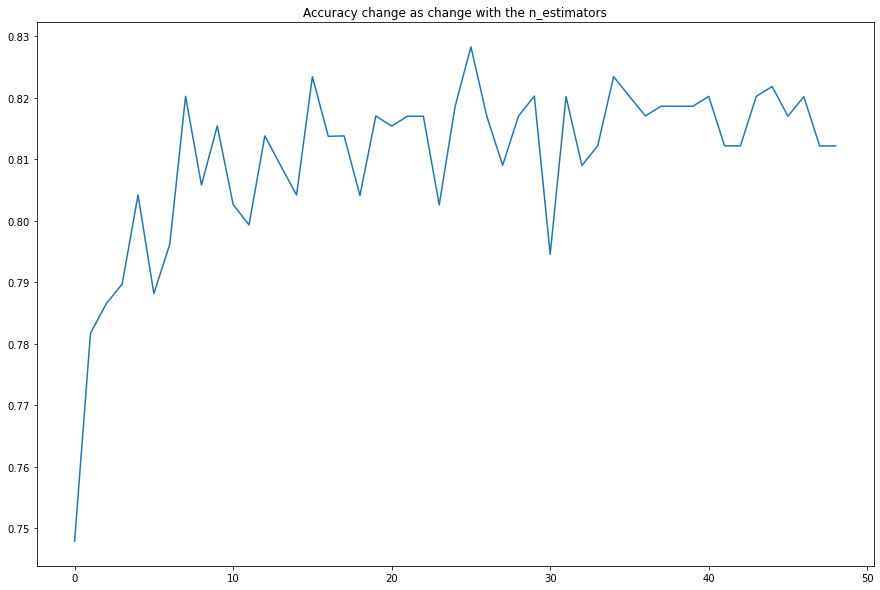

In [55]:
plt.figure(figsize=(15,10))
plt.title("Accuracy change as change with the n_estimators")
plt.plot(acc_list)
plt.show()

In [56]:
np.argmax(acc_list)

25

In [57]:
print(f"Max Accuracy we can get in criterion gini is {acc_list[np.argmax(acc_list)]} and the estimators or tree required to make was {np.argmax(acc_list) + 1}")

Max Accuracy we can get in criterion gini is 0.8282322580645161 and the estimators or tree required to make was 26
